Project: Basic Economic Model
===
Nikita DOVHAN




In [816]:
import numpy as np
import matplotlib.pyplot as plt

TASK
===

Create a simulation of a simple market where agents are consumers and producers, demonstrating basic economic principles like supply and demand.

The Basic Economic Market Model project involves creating a simplified simulation of a market economy, where agents act as consumers and producers. This project is a great introduction to agent-based modelling in economics, illustrating fundamental economic principles like supply and demand, price mechanisms, and market equilibrium. Here is an in-depth description:

Objective

To simulate a basic market economy where individual agents act as producers and consumers. The goal is to observe how market prices, supply, and demand evolve over time based on the interactions between these agents and their decision-making processes.

Model Description

Agents

* Producers: Create goods or services. They decide on quantities to produce and at what price to sell based on production costs and market demand.

* Consumers: Purchase goods or services based on their preferences, needs, and the market price.

Environment

* A virtual marketplace where transactions between producers and consumers takes place.

* The environment can be abstract without a physical space representation, focusing instead on the dynamics of price and quantity.

Rules

* Supply and Demand Dynamics: Producers adjust their supply based on the market price, and consumers adjust their demand based on their utility and the price.

* Price Adjustment: The market price can adjust based on the aggregate supply and demand.

* Economic Constraints: Consumers have budget constraints, and producers have production limits.

Initial Conditions

* Define initial quantities and prices for the goods or services.

* Set initial economic conditions for the agents, such as initial budgets for consumers and initial production capacities for producers.

Simulation Loop

* At each time step, producers and consumers make decisions based on current market conditions.

* Update the market price based on the total supply and demand.

* Update the state of each agent (e.g., producers’ inventory and consumers’ budget) post transactions.

Data Collection

* Track changes in market prices, supply, and demand over time.

* Analyse patterns such as market equilibrium, shortages, or surpluses.

Tools and Libraries

* Python, as the programming language, is ideal for this simulation.

* NumPy for numerical calculations, especially for handling large arrays of agent data.

* Matplotlib or Seaborn for visualizing market trends and agent behaviours over time.

Outcome

The simulation should depict how market dynamics evolve from the interaction of supply and demand.

You can observe how prices fluctuate to balance supply and demand and reach a market equilibrium under various scenarios.

The model can be used to study the impact of different economic policies, such as taxes or subsidies, on the market.

The Basic Economic Market Model project provides you with an understanding of how individual decisions collectively impact the economy. It serves as an excellent tool for visualizing and understanding economic concepts and the functioning of markets. 

In [817]:
p0 = 100
q0 = 10
budget = 300
prod_cap = 3
prod = 5
cons = 5
want = 0.3
salary = 70
N = 150

# Additional Parameters
initial_consumer_budget_range = (250, 350)  # Adjust as needed
initial_producer_capacity_range = (2, 4)  # Adjust as needed
initial_consumer_preference_range = (0.7, 1.0)  # Adjust as needed
initial_quantity_range = (8, 12)  # Adjust as needed

transactions = []
time_steps = []
transaction_prices = []

In [818]:
producers = [[prod_cap + np.random.randint(0, 3) - 1, p0 + np.random.randint(0, 21) - 10 - 20] for _ in range(prod)]

producers

[[3, 86], [2, 72], [4, 83], [2, 85], [2, 86]]

In [819]:
consumers = [
    [
        np.random.uniform(*initial_consumer_preference_range),  # Adjusted for uniform distribution
        np.random.randint(0, 5),
        budget + np.random.randint(0, 101) - 50
    ] for _ in range(cons)
]

consumers

[[0.9490104397478575, 4, 266],
 [0.9463621034848324, 0, 251],
 [0.8923837423803532, 4, 274],
 [0.7663359174895311, 1, 349],
 [0.8282973196376087, 3, 279]]

In [820]:
market = [p0 + np.random.randint(0, 21) - 10 for _ in range(q0)]
market

[99, 91, 90, 99, 100, 99, 99, 97, 100, 109]

In [821]:
for j in range(N):
    # Consumer behavior
    for i in range(len(consumers)):
        # Decision-making process for consumers
        preference = consumers[i][0]
        needs = consumers[i][1]
        budget = consumers[i][2]

        minimal_price = min(market)
        percentage_of_budget = budget / minimal_price
        want_to_buy = needs * preference / percentage_of_budget

        if want_to_buy > want and budget > minimal_price:
            consumers[i][2] -= minimal_price + salary
            market_fluctuations = np.random.normal(0, 5, len(market))
            market += market_fluctuations

            # Randomly increase the production capacity of a producer
            producers[np.random.randint(0, len(producers))][0] += 1

            if len(market) == 0:
                break

    # Producer behavior
    for i in range(len(producers)):
        cap = producers[i][0]
        costs = producers[i][1]
        if cap > 0:
            cost = 0
            market_mean = np.mean(market)
            if costs > market_mean:
                continue
            else:
                cost = market_mean + np.random.randint(0, 11) - 5
            producers[i][0] -= 1
            market_fluctuations = np.random.normal(0, 5)
            market = np.append(market, cost)

    # Market adjustment process
    # ... (adjustments if needed)

    # Record the transactions for visualization after each time step
    transactions.extend([[market_price, j] for market_price in market])

In [822]:
average_prices = []
for step in range(N):
    prices_for_step = [transaction[0] for transaction in transactions if transaction[1] == step]
    average_price = np.mean(prices_for_step) if prices_for_step else 0
    average_prices.append(average_price)

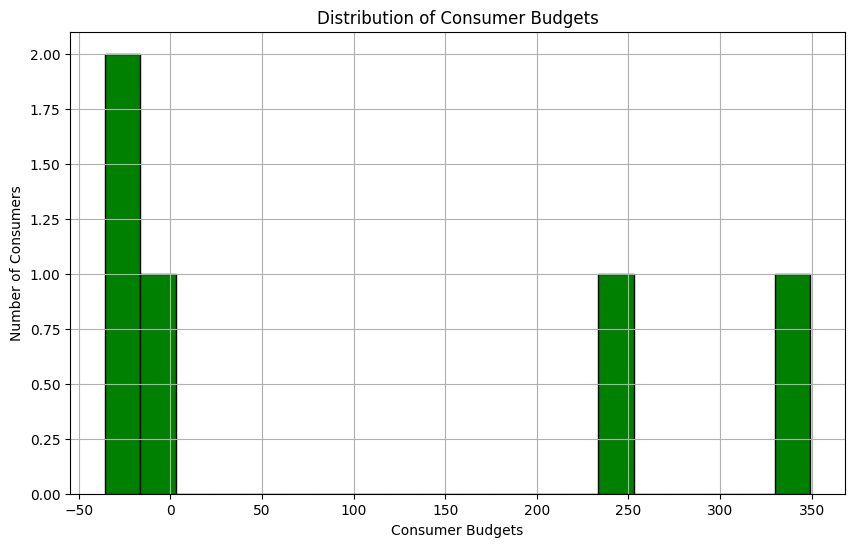

In [823]:
plt.figure(figsize=(10, 6))
plt.hist([consumer[2] for consumer in consumers], bins=20, color='green', edgecolor='black')
plt.xlabel('Consumer Budgets')
plt.ylabel('Number of Consumers')
plt.title('Distribution of Consumer Budgets')
plt.grid(True)
plt.show()

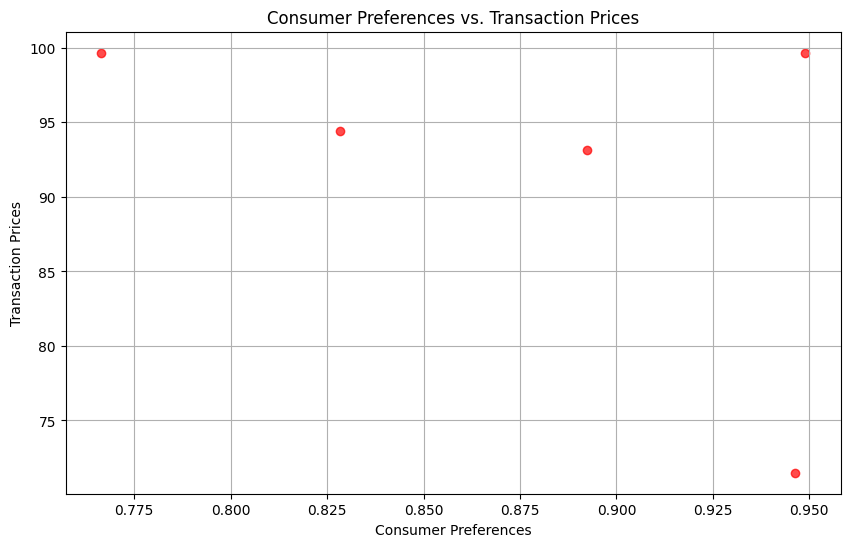

In [824]:
plt.figure(figsize=(10, 6))

# Filter transactions based on the indices of consumers
filtered_transactions = [transactions[i][0] for i in range(len(transactions)) if i < len(consumers)]

plt.scatter([consumer[0] for consumer in consumers], filtered_transactions, c='red', alpha=0.7)
plt.xlabel('Consumer Preferences')
plt.ylabel('Transaction Prices')
plt.title('Consumer Preferences vs. Transaction Prices')
plt.grid(True)
plt.show()

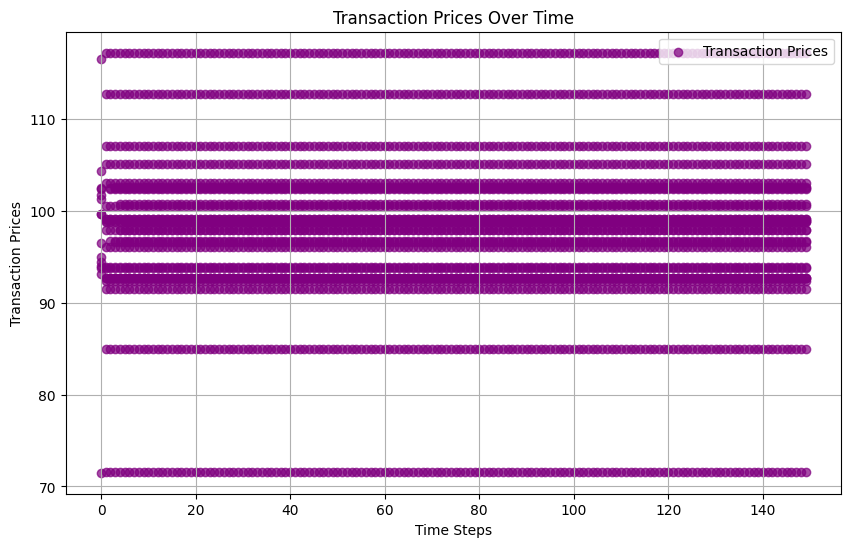

In [825]:
plt.figure(figsize=(10, 6))
plt.scatter([transaction[1] for transaction in transactions], [transaction[0] for transaction in transactions], c='purple', alpha=0.7, label='Transaction Prices')
plt.xlabel('Time Steps')
plt.ylabel('Transaction Prices')
plt.title('Transaction Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [826]:
transactions

[[99.64040699681303, 0],
 [71.49230888154561, 0],
 [93.14852340109888, 0],
 [99.6725487571473, 0],
 [94.43901967900341, 0],
 [102.48218432378827, 0],
 [94.96044577629578, 0],
 [101.26607151638213, 0],
 [104.35500880104274, 0],
 [116.53506479774366, 0],
 [93.79915829308607, 0],
 [96.4355219294497, 0],
 [102.35218859611638, 0],
 [101.73680398073176, 0],
 [94.02251826644604, 0],
 [112.66560216256902, 1],
 [71.5966068521389, 1],
 [92.40236377134714, 1],
 [99.11268773792996, 1],
 [105.1025849683296, 1],
 [93.7538786999395, 1],
 [95.99561910672398, 1],
 [99.08370650469496, 1],
 [117.18536844437585, 1],
 [107.07056358657196, 1],
 [100.47038716133277, 1],
 [84.91990391879013, 1],
 [103.02160247200507, 1],
 [92.70532775533928, 1],
 [91.49151447618732, 1],
 [98.77184784121839, 1],
 [98.83434784121836, 1],
 [97.89317137063013, 1],
 [93.89317137063013, 1],
 [92.68264505484066, 1],
 [112.66560216256902, 2],
 [71.5966068521389, 2],
 [92.40236377134714, 2],
 [99.11268773792996, 2],
 [105.102584968329

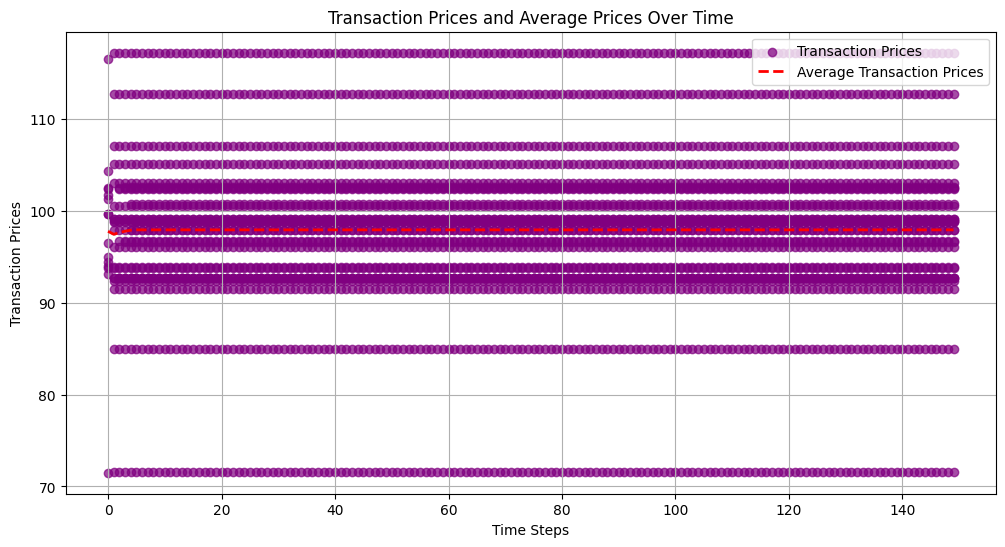

In [827]:
plt.figure(figsize=(12, 6))
plt.scatter([transaction[1] for transaction in transactions], [transaction[0] for transaction in transactions], c='purple', alpha=0.7, label='Transaction Prices')
plt.plot(range(N), average_prices, linestyle='--', linewidth=2, color='red', label='Average Transaction Prices')
plt.xlabel('Time Steps')
plt.ylabel('Transaction Prices')
plt.title('Transaction Prices and Average Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()